importing libs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from google.colab import files

In [4]:
uploaded = files.upload()

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data (1).csv


reading file and checking head

In [5]:
df = pd.read_csv("Car_Purchasing_Data.csv", encoding='ISO-8859-1')

In [6]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


visualizing data

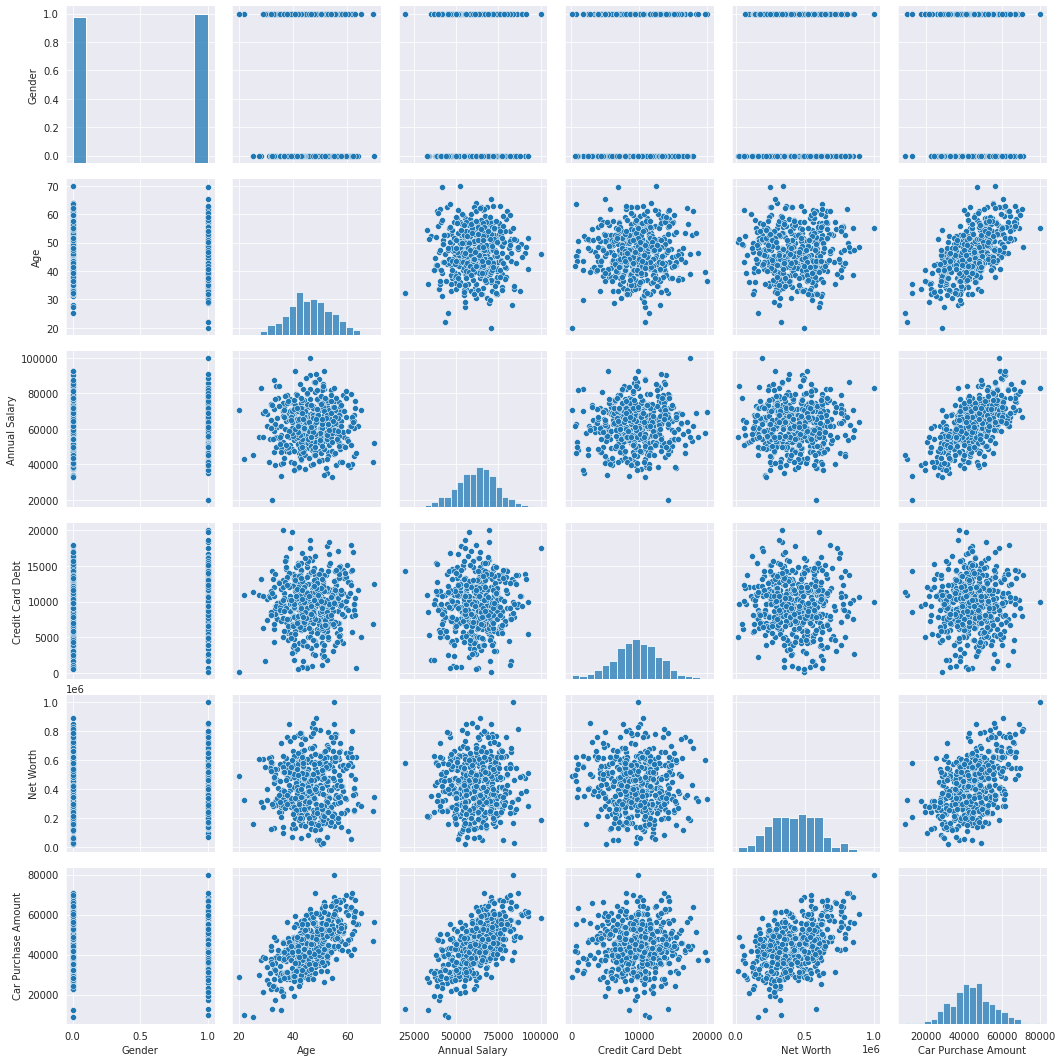

In [7]:
sns.set_style('darkgrid')
sns.pairplot(df)

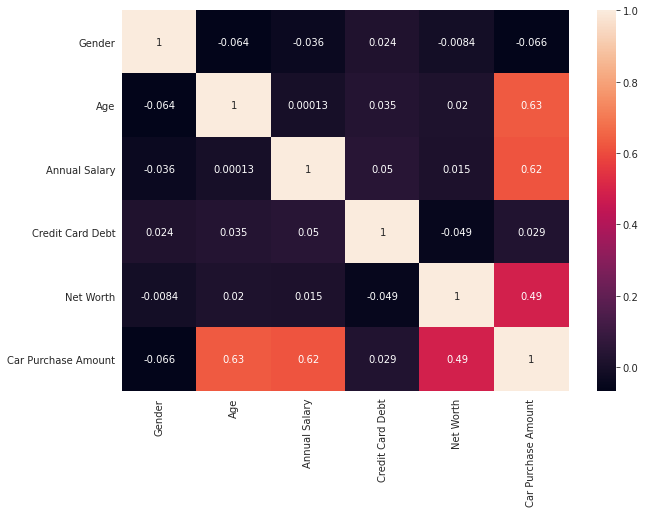

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

removing unwanted features + data splitting

In [9]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
y = df["Car Purchase Amount"]
print("X\n", X.head())
print("\ny\n",y.head())

X
    Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0       0  41.851720    62812.09301      11609.380910  238961.2505
1       0  40.870623    66646.89292       9572.957136  530973.9078
2       1  43.152897    53798.55112      11160.355060  638467.1773
3       1  58.271369    79370.03798      14426.164850  548599.0524
4       1  57.313749    59729.15130       5358.712177  560304.0671

y
 0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: Car Purchase Amount, dtype: float64


In [10]:
print(X.shape)
print(y.shape)

(500, 5)
(500,)


scaling data

In [11]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [12]:
X_scaled[:5, :]

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       [1.        , 0.76542739, 0.74212547, 0.71990778, 0.53938679],
       [1.        , 0.74627499, 0.49661439, 0.26425689, 0.55133068]])

In [13]:
y_scaled[:5]

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state=101)

building model

In [15]:
model = Sequential()

model.add(Dense(25, input_dim=5, activation='relu', name="hidden_layer1"))
model.add(Dense(25, activation='relu', name="hidden_layer2"))
model.add(Dense(1, activation='linear', name="output_layer"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 25)                150       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 25)                650       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
epochs_hist = model.fit(X_train, y_train, epochs=30, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/30
12/12 [==============================] - 15s 47ms/step - loss: 0.1476 - val_loss: 0.0248
Epoch 2/30
12/12 [==============================] - 0s 6ms/step - loss: 0.0192 - val_loss: 0.0120
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.0102
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.0088
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 9/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 10/30
12/12 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 11/30
12/12

evaluation

In [18]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0.5, 1.0, 'Loss vs Epoch')

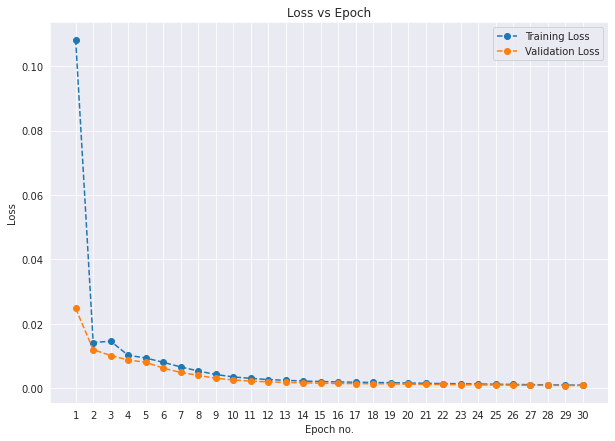

In [19]:
plt.figure(figsize=(10,7))
plt.plot(range(1,31), epochs_hist.history['loss'], linestyle='dashed', marker = "o")
plt.plot(range(1,31), epochs_hist.history['val_loss'], linestyle='dashed', marker = "o")
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch no.")
plt.xticks(range(1,31,1))
plt.ylabel("Loss")
plt.title('Loss vs Epoch')

In [20]:
sample = np.array([[1, 50, 50000, 10985, 629312]])
y_predict = model.predict(sample)
print(y_predict.shape)
print('Expected Purchase Amount=', y_predict[:,0])


(1, 1)
Expected Purchase Amount= [149574.06]
